In [57]:
#Plotter - This is what will be run to create all different plots.

'''
Plots needed (based on Maddie's Senior Thesis Slides):
Confusion Matrices:
1. MC Truth Label versus DNN Max Category - DONE
2. MC Truth Label versus User Agreement - DONE
3. MC Truth Label versus User Agreement -> All Qtot then only Qtot > 250 - DONE

Histogram:
log Qtot versus Accuracy, user confidence  on color axis - DO NEXT

Line Plots:
1. Average User Accuracy vs Qtot by Topology, with user accuracy uncertainty bars
2. Average User, DNN Accuracy vs Qtot by Topology
'''

#once code is done for all of these different ones, combine into singular .py file, having the different plotting parts as functions that 
#can be called upon, making the structure more streamlined!

"\nPlots needed (based on Maddie's Senior Thesis Slides):\nConfusion Matrices:\n1. MC Truth Label versus DNN Max Category - DONE\n2. MC Truth Label versus User Agreement - DONE\n3. MC Truth Label versus User Agreement -> All Qtot then only Qtot > 250 - DONE\n\nHistogram:\nlog Qtot versus Accuracy, user confidence  on color axis - DO NEXT\n\nLine Plots:\n1. Average User Accuracy vs Qtot by Topology, with user accuracy uncertainty bars\n2. Average User, DNN Accuracy vs Qtot by Topology\n"

Enter input directory path:  C:\\Users\\jonat\\Documents\\IceCube Research Stuff\\output_data
Enter file name (e.g. consolidated-July2.csv):  consolidated-July6.csv


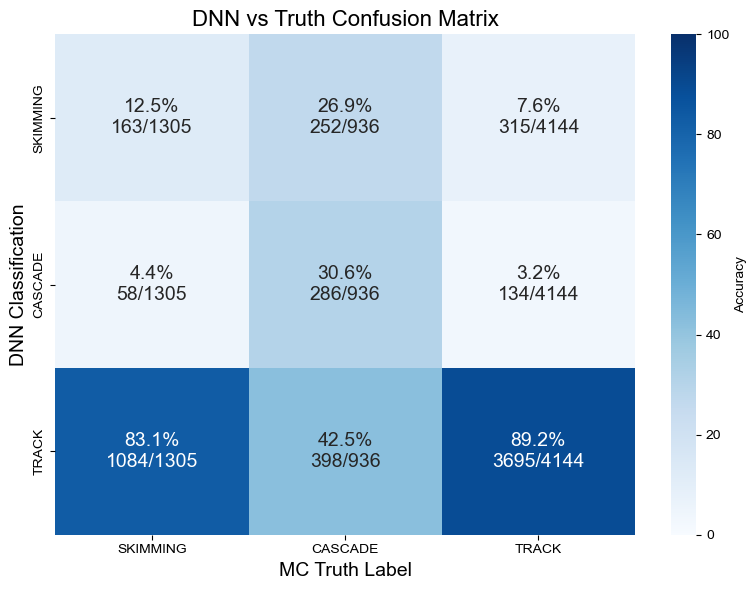

In [53]:
# Confusion Matrix 1
# DNN Max Category versus MC Truth Label - all Qtot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set global font to Arial to avoid Helvetica errors
plt.rcParams["font.family"] = ["Arial"]

# --- Prompt for input ---
input_dir = input("Enter input directory path: ").strip()
file_name = input("Enter file name (e.g. consolidated-July2.csv): ").strip()
file_path = os.path.join(input_dir, file_name)

# --- Load file ---
df = pd.read_csv(file_path)

# --- Define categories ---
categories = ['SKIMMING', 'CASCADE', 'TRACK']
df['ntn_category'] = pd.Categorical(df['ntn_category'], categories=categories, ordered=True)
df['idx_max_score'] = pd.Categorical(df['idx_max_score'], categories=categories, ordered=True)

# --- Generate raw counts ---
counts = pd.crosstab(df['idx_max_score'], df['ntn_category'],
                     rownames=['DNN Classification'], colnames=['MC Truth Label'])

# --- Generate normalized percentages (column-wise) ---
percent = pd.crosstab(df['idx_max_score'], df['ntn_category'],
                      normalize='columns') * 100
percent = percent.round(1)

# --- Create annotation text: "xx.x% \n count/total" ---
annot = percent.astype(str) + '%' + '\n' + counts.astype(str) + '/' + counts.sum(axis=0).astype(str)

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(percent, annot=annot, fmt='', cmap='Blues', vmin=0, vmax=100,
            xticklabels=categories, yticklabels=categories, annot_kws={"size": 14},
            cbar_kws={'label': 'Accuracy'})

plt.xlabel("MC Truth Label", fontsize=14)
plt.ylabel("DNN Classification", fontsize=14)
plt.title("DNN vs Truth Confusion Matrix", fontsize=16)
plt.tight_layout()

# --- Save plot ---
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/dnn_vs_truth_confusion_matrix.png", dpi=300)
plt.show()


Enter input directory path:  C:\\Users\\jonat\\Documents\\IceCube Research Stuff\\output_data
Enter file name (e.g. consolidated-July2.csv):  consolidated-July2.csv


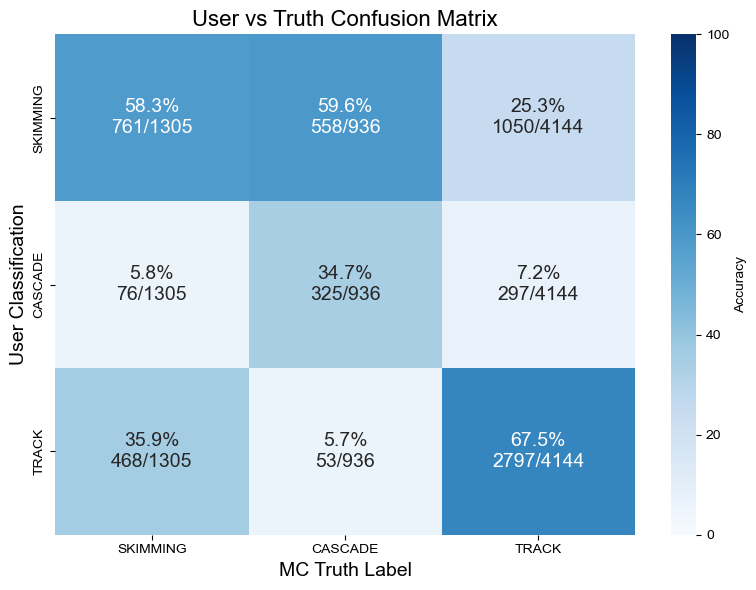

In [35]:
#Confusion Matrix 2
#User Agreement versus MC Truth Label - all Qtot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.rcParams["font.family"] = ["Arial"]

input_dir = input("Enter input directory path: ").strip()
file_name = input("Enter file name (e.g. consolidated-July2.csv): ").strip()
file_path = os.path.join(input_dir, file_name)

df = pd.read_csv(file_path)

categories = ['SKIMMING', 'CASCADE', 'TRACK']
df['ntn_category'] = pd.Categorical(df['ntn_category'], categories=categories, ordered=True)
df['data.most_likely'] = pd.Categorical(df['data.most_likely'], categories=categories, ordered=True)

# Counts matrix (raw counts)
counts = pd.crosstab(df['data.most_likely'], df['ntn_category'],
                     rownames=['User Classification'], colnames=['MC Truth Label'])

# Percent matrix normalized by columns (per MC truth label)
percent = pd.crosstab(df['data.most_likely'], df['ntn_category'],
                      normalize='columns') * 100

col_totals = counts.sum(axis=0)

# Annotation: percent (rounded) + count/column total
annot = percent.round(1).astype(str) + '%' + '\n' + counts.astype(str) + '/' + col_totals.astype(str)

plt.figure(figsize=(8, 6))
sns.heatmap(percent, annot=annot, fmt='', cmap='Blues', vmin=0, vmax=100,
            xticklabels=categories, yticklabels=categories, annot_kws={"size": 14},
            cbar_kws={'label': 'Accuracy'})

plt.xlabel("MC Truth Label", fontsize=14)
plt.ylabel("User Classification", fontsize=14)
plt.title("User vs Truth Confusion Matrix", fontsize=16)
plt.tight_layout()

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/user_vs_truth_confusion_matrix.png", dpi=300)
plt.show()


Enter input directory path:  C:\\Users\\jonat\\Documents\\IceCube Research Stuff\\output_data
Enter file name (e.g. consolidated-July2.csv):  consolidated-July2.csv


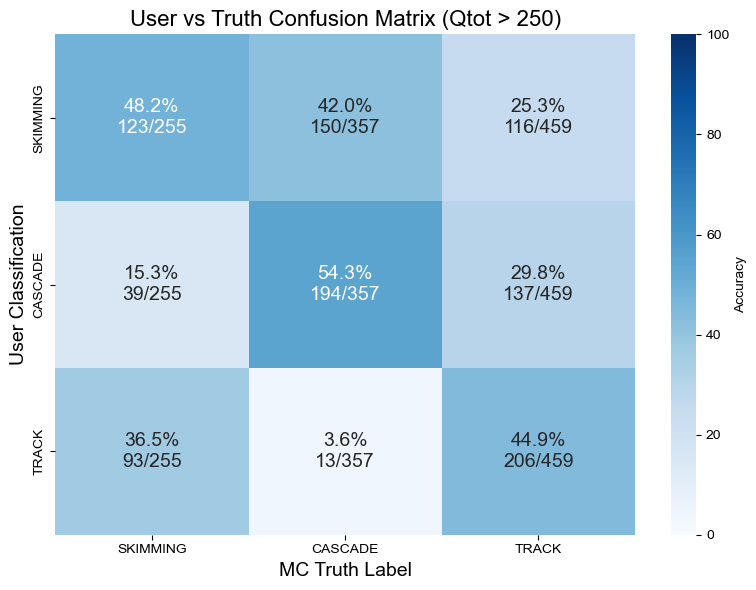

In [51]:
# Confusion Matrix 3
# User Agreement versus MC Truth Label - Qtot > 250

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set global font to Arial
plt.rcParams["font.family"] = ["Arial"]

# --- Prompt for input ---
input_dir = input("Enter input directory path: ").strip()
file_name = input("Enter file name (e.g. consolidated-July2.csv): ").strip()
file_path = os.path.join(input_dir, file_name)

# --- Load and filter data ---
df = pd.read_csv(file_path)
df = df[df['qtot'] > 250]  # Filter for Qtot > 250

# --- Define categories ---
categories = ['SKIMMING', 'CASCADE', 'TRACK']
df['ntn_category'] = pd.Categorical(df['ntn_category'], categories=categories, ordered=True)
df['data.most_likely'] = pd.Categorical(df['data.most_likely'], categories=categories, ordered=True)

# --- Generate counts matrix (raw counts) ---
counts = pd.crosstab(df['data.most_likely'], df['ntn_category'],
                     rownames=['User Classification'], colnames=['MC Truth Label'])

# --- Generate percent matrix normalized by column (MC truth) ---
percent = pd.crosstab(df['data.most_likely'], df['ntn_category'],
                      normalize='columns') * 100
percent = percent.round(1)

# --- Generate annotation: "xx.x%\ncount/total" ---
col_totals = counts.sum(axis=0)
annot = percent.astype(str) + '%' + '\n' + counts.astype(str) + '/' + col_totals.astype(str)

# --- Plot ---
plt.figure(figsize=(8, 6))
sns.heatmap(percent, annot=annot, fmt='', cmap='Blues', vmin=0, vmax=100,
            xticklabels=categories, yticklabels=categories, annot_kws={"size": 14},
            cbar_kws={'label': 'Accuracy'})

plt.xlabel("MC Truth Label", fontsize=14)
plt.ylabel("User Classification", fontsize=14)
plt.title("User vs Truth Confusion Matrix (Qtot > 250)", fontsize=16)
plt.tight_layout()

# --- Save plot ---
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/user_vs_truth_confusion_matrix_qtot_gt_250.png", dpi=300)
plt.show()
